# Ford Gobike Data Exploration
# By Freddy Sanchez

## Preliminary Wrangling

This document explores a dataset containing the trip data of the ford gobike approximately 183,412.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# change the data type for start and end time to be datetime64[ns] 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
# change the data type for bike_share_for_all_trip to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True


In [10]:
df.describe()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183412,183412,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,2019-02-15 21:07:59.090985728,2019-02-15 21:20:05.668533504,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,2019-02-08 08:31:50.814249984,2019-02-08 08:42:17.385500160,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,2019-02-15 23:05:02.337500160,2019-02-15 23:17:22.168000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,2019-02-22 11:01:16.969750016,2019-02-22 11:14:24.885750016,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000
std,1794.389780,NaN,NaN,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689


### Understanding the Dataset

#### Structure:

The dataset contains 183,412 bike trip records from Ford GoBike, each with 16 attributes. These attributes include numerical data (e.g., duration_sec, start_station_id, bike_id), categorical data (e.g., user_type, member_gender), and temporal data (e.g., start_time, end_time).

### Key Features of Interest:

To understand the factors influencing trip duration, I will focus on the following variables:

Age: Derived from member_birth_year
Start Station: start_station_name
End Station: end_station_name
User Type: customer or subscriber
Gender: male, female, or other

### Hypothesis
Based on domain knowledge, I hypothesize that:

Start and End Stations: Popular stations with high traffic may have shorter average trip durations due to frequent availability of bikes.
User Type: Subscribers, likely frequent users, might have shorter trips compared to casual customers.
Age: Younger riders may have different trip patterns than older ones.
Gender: There might be subtle differences in trip characteristics between genders.

### Univariate Exploration
To begin, I will examine the distribution of the primary variable of interest: trip duration (duration_sec). This will provide insights into the overall duration patterns and potential outliers.

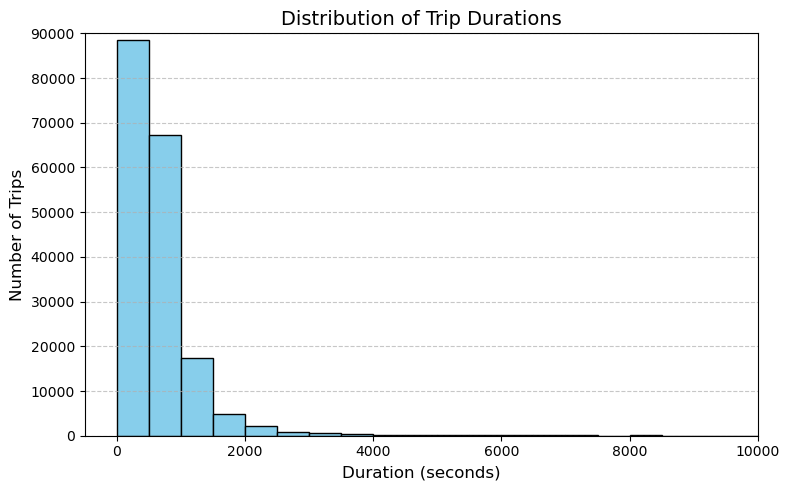

In [14]:
binsize = 500
max_duration = df['duration_sec'].max()
bins = np.arange(0, max_duration + binsize, binsize)

plt.figure(figsize=(8, 5))
plt.hist(df['duration_sec'], bins=bins, color='skyblue', edgecolor='black')

plt.title('Distribution of Trip Durations', fontsize=14)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xlim(-500, 10000)
plt.ylim(0, 90000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

/var/folders/7l/f_38vrtj615d6c9hv640j55w0000gq/T/ipykernel_18269/637490807.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.axis([0, 10000, 0, 15000])


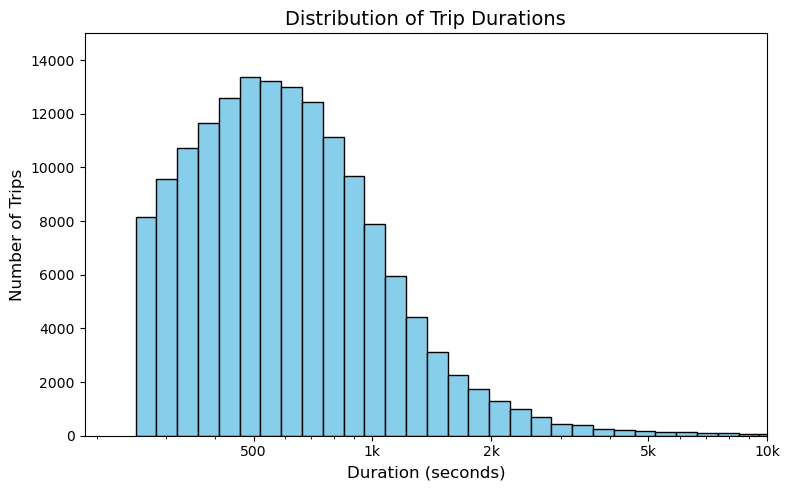

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define logarithmic bin edges using np.logspace for clarity
bins_log = np.logspace(2.4, np.log10(df['duration_sec'].max()) + 0.05, base=10)

plt.figure(figsize=(8, 5))

# Create the histogram with defined logarithmic bins and edge colors for better visibility
plt.hist(df['duration_sec'], bins=bins_log, edgecolor='black', color='skyblue')

# Set the x-axis to a logarithmic scale
plt.xscale('log')

# Customize x-ticks for better readability
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], ['500', '1k', '2k', '5k', '10k'])

# Set axis limits to focus on the desired range
plt.axis([0, 10000, 0, 15000])

# Add titles and labels with increased font sizes for clarity
plt.title('Distribution of Trip Durations', fontsize=14)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

# Optimize layout to prevent clipping of labels and titles
plt.tight_layout()

# Display the plot
plt.show()


The majority of trip durations fall below 2000 seconds, with a prominent peak around 600 seconds. Here's a breakdown of the distribution:

Increasing Trend: The number of trips rises steadily from approximately 8,000 trips at shorter durations, reaching up to 12,500 trips around the 600-second mark.

Peak and Decline: After peaking at 600 seconds, the number of trips begins to decrease, dropping below 2,000 trips for durations under 2000 seconds.

This pattern indicates that most trips are relatively short, with a significant concentration of trips lasting around 10 minutes.

Key Predictor Variables: Start Station and End Station
The first variables of interest in predicting trip duration are:

Start Station:
- Name: The specific location where the trip begins.
- Geographical Coordinates: Latitude and longitude of the start station.

End Station:
- Name: The specific location where the trip concludes.
- Geographical Coordinates: Latitude and longitude of the end station.

Analyzing these variables will help us understand how the choice of start and end stations influences the length of each trip.

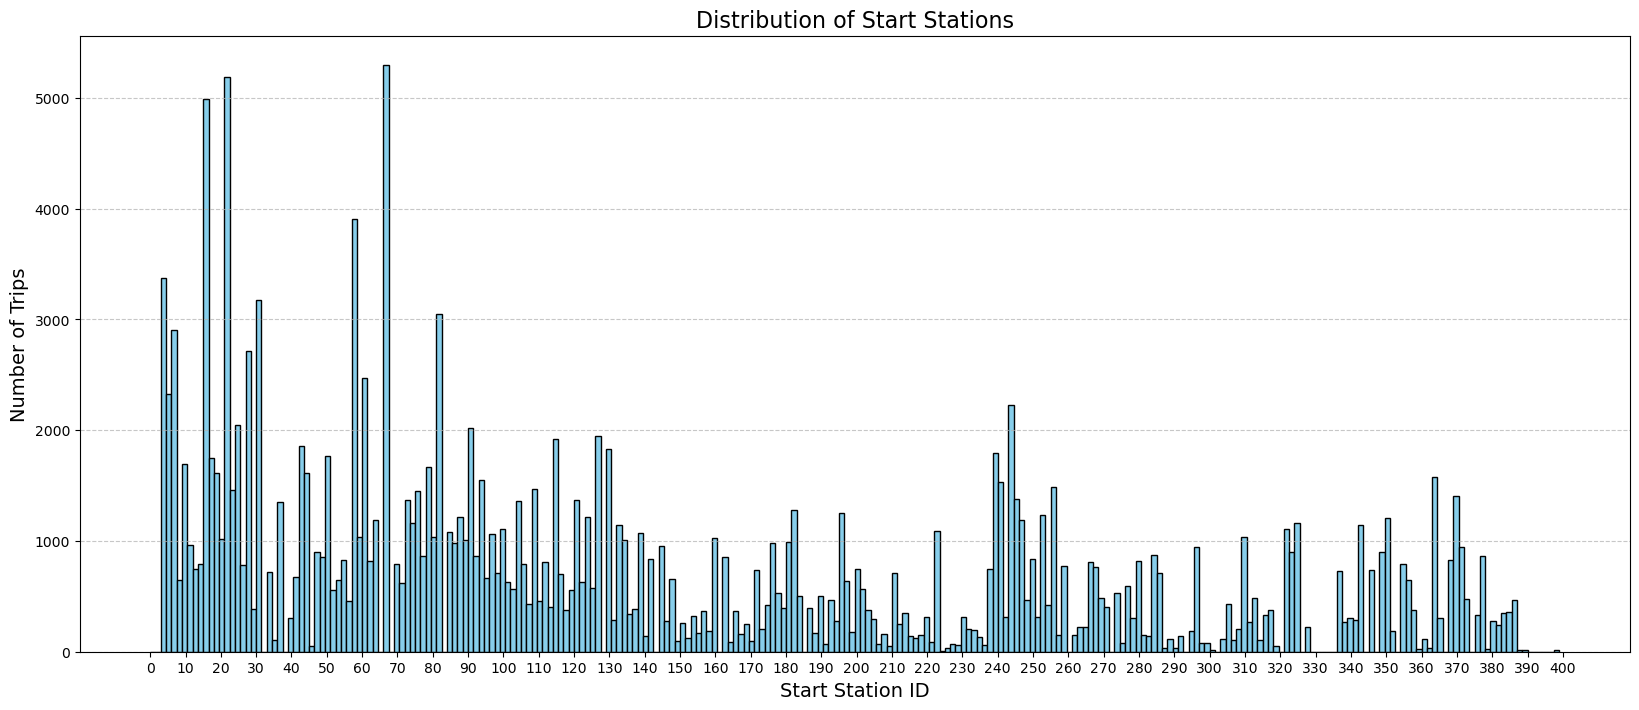

In [19]:
# Define bin size and calculate bins
binsize = 1.5
max_station = df['start_station_id'].max()
bins = np.arange(0, max_station + binsize, binsize)

# Plot the histogram
plt.figure(figsize=(20, 8))
plt.xticks(np.arange(0, 402, 10))
plt.hist(df['start_station_id'].dropna(), bins=bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Start Stations', fontsize=16)
plt.xlabel('Start Station ID', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

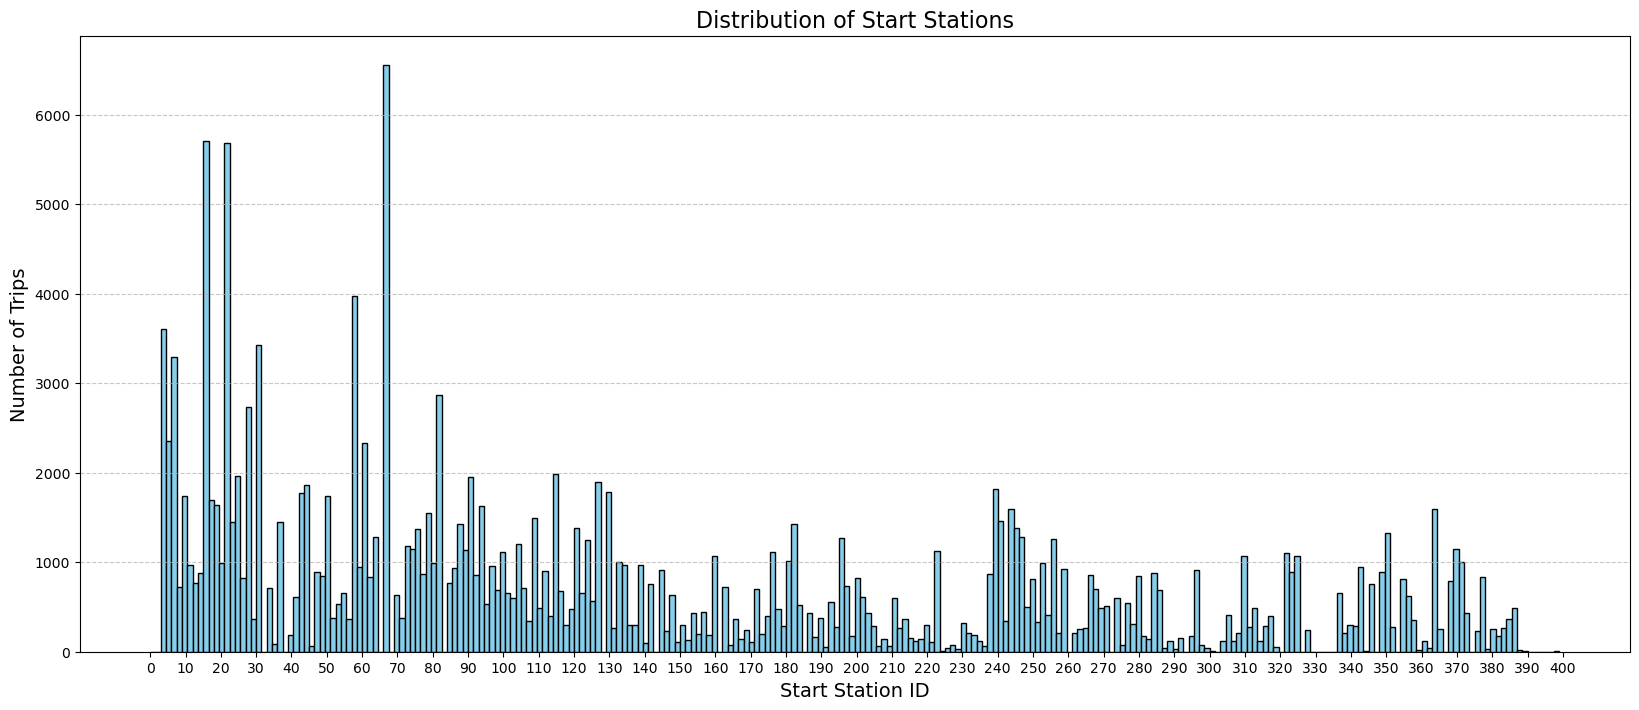

In [20]:
# Define bin size and calculate bins
binsize = 1.5
max_station = df['end_station_id'].max()
bins = np.arange(0, max_station + binsize, binsize)

# Plot the histogram
plt.figure(figsize=(20, 8))
plt.xticks(np.arange(0, 402, 10))
plt.hist(df['end_station_id'].dropna(), bins=bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Start Stations', fontsize=16)
plt.xlabel('Start Station ID', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

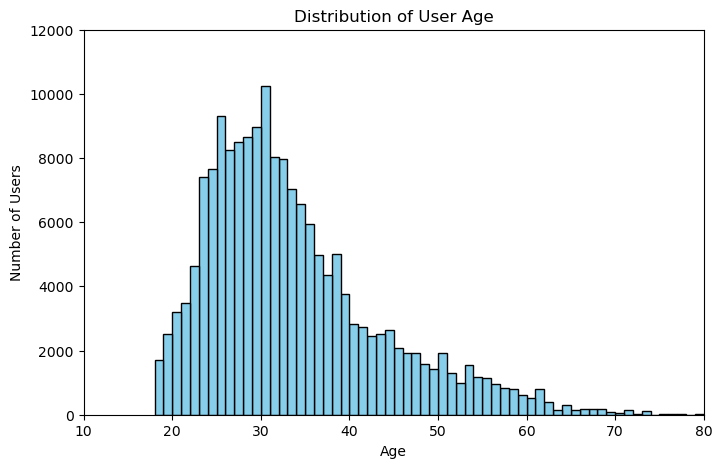

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define bin size and create bins for birth years
binsize = 1
max_birth_year = df['member_birth_year'].dropna().astype(float).max()
bins = np.arange(0, max_birth_year + binsize, binsize)

# Plot histogram of member_birth_year
plt.figure(figsize=(8, 5))
plt.hist(df['member_birth_year'].dropna(), bins=bins, color='skyblue', edgecolor='black')

# Set axis limits
plt.axis([1939, 2009, 0, 12000])

# Define tick labels as ages instead of birth years
age_ticks = [1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009]
age_labels = [2019 - year for year in age_ticks]
plt.xticks(age_ticks, age_labels)

# Invert x-axis to display ages in ascending order from left to right
plt.gca().invert_xaxis()

# Add titles and labels
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')

# Display the plot
plt.show()


User distribution is highly concentrated between 20 to 40 years old.


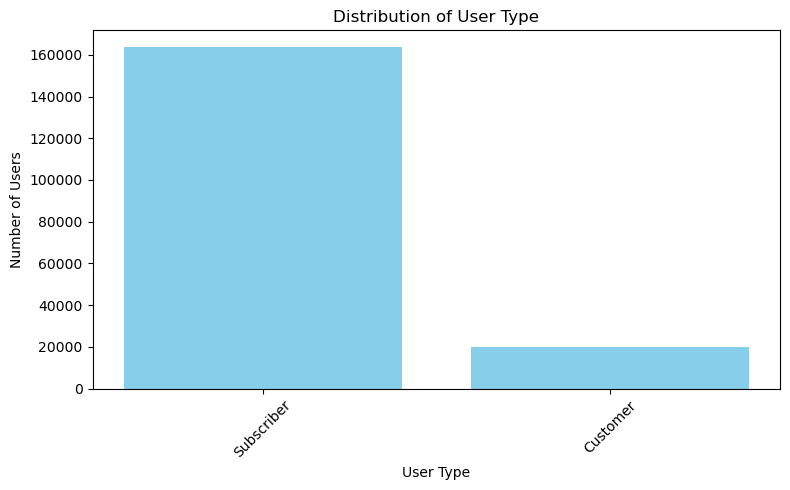

In [21]:
user_counts = df['user_type'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(user_counts.index, user_counts.values, color='skyblue')
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()

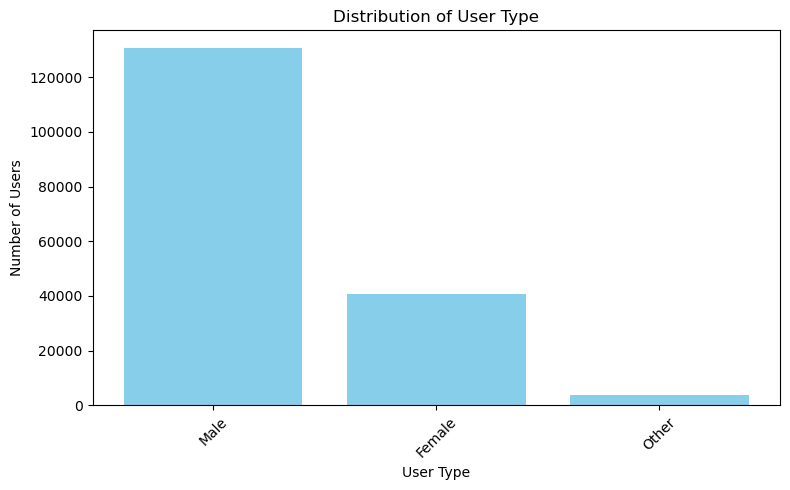

In [25]:
gender_counts = df['member_gender'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values, color='skyblue')
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)  
plt.tight_layout()    
plt.show()

## Variable Distributions

Trip Duration: The trip duration spans a wide range of values, with a significant concentration around 600 seconds. The distribution starts at 0 seconds, peaks at 600 seconds, and then gradually declines without additional peaks. This indicates that most trips last approximately 10 minutes, with fewer trips being significantly shorter or longer.

Feature Distributions:
- Age: To analyze age distribution, we calculated age by subtracting the birth year from the current year. This transformation provided a more intuitive understanding of the age groups within the dataset.
- Start and End Stations: We visualized start and end stations using larger plots, which revealed patterns in bike traffic across different locations. These plots highlighted which stations are busiest, offering insights into popular routes and potential areas for infrastructure improvements.

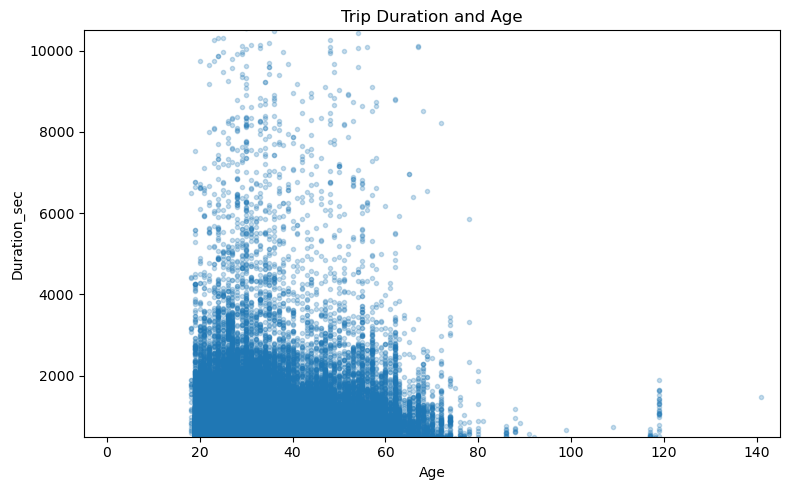

In [16]:
# Calculate age
df['age'] = 2019 - df['member_birth_year']

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['duration_sec'], alpha=0.25, marker='.')
plt.xlim(-5, 145)
plt.ylim(500, 10500)
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.tight_layout()
plt.show()

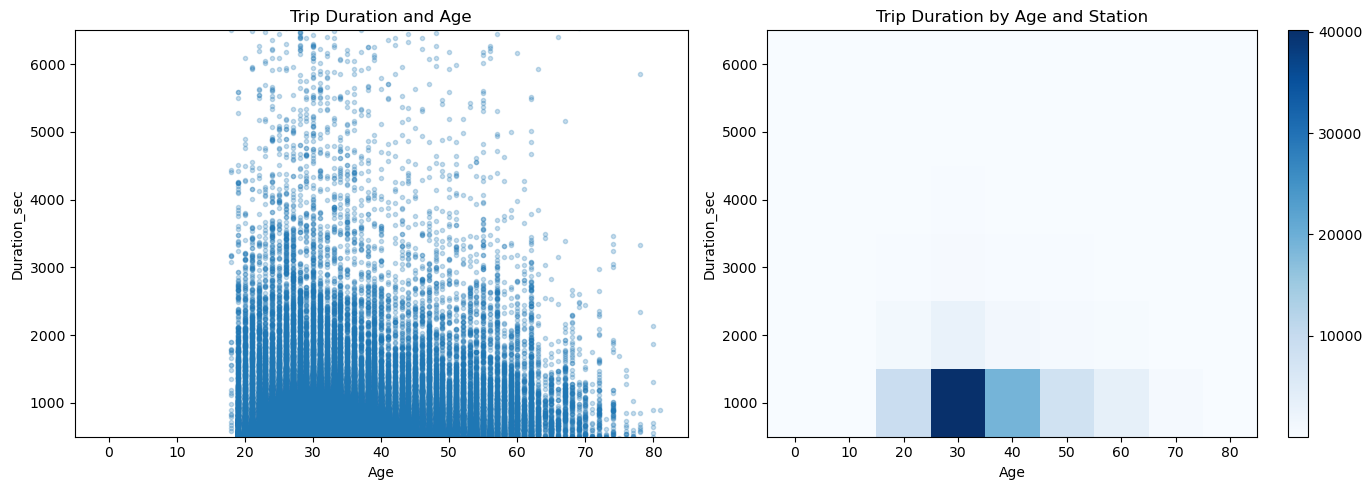

In [17]:
import matplotlib.pyplot as plt
import numpy as np

age = 2019 - df['member_birth_year']
duration = df['duration_sec']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(age, duration, alpha=0.25, marker='.')
axes[0].set_xlim(-5, 85)
axes[0].set_ylim(500, 6500)
axes[0].set_title('Trip Duration and Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Duration_sec')

bins_x = np.arange(-5, 85 + 10, 10)      # Bins for Age
bins_y = np.arange(500, 6500 + 1000, 1000)  # Bins for Duration_sec

h = axes[1].hist2d(age, duration, bins=[bins_x, bins_y], cmap='Blues')

fig.colorbar(h[3], ax=axes[1], ticks=[10000, 20000, 30000, 40000])
axes[1].set_title('Trip Duration by Age and Station')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Duration_sec')

plt.tight_layout()

plt.show()


Most frequent users aged between 20 and 45. To highlight, higher duration trips are more attributable to younger users.

We can clearly see that trip duration for some station for start station is higher and for some stations for end station is higher. Hence we can differentiate by each distinct stations which ones start or end longer tris

Combined Duration DataFrame:
   station_id  total_duration station_type
0           3         2401087        Start
1           4          615184        Start
2           5         2124528        Start
3           6         2263167        Start
4           7          590906        Start

Data Types:
station_id         int64
total_duration     int64
station_type      object
dtype: object


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


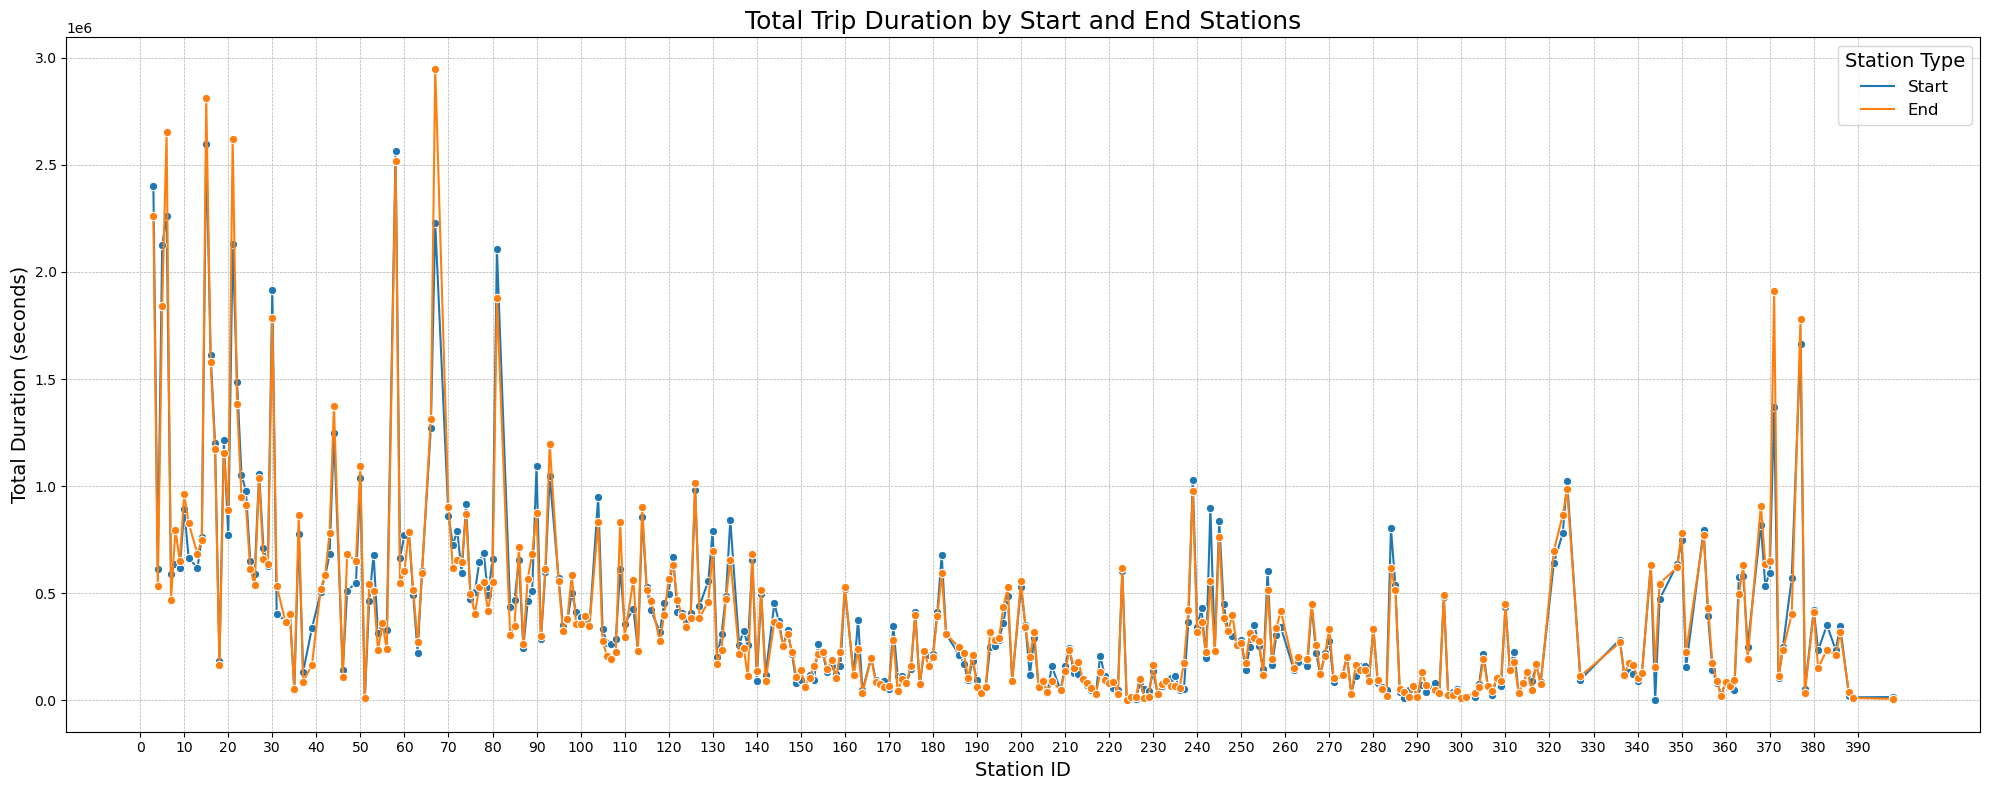

No infinite values found in 'total_duration'.

Value Counts by Station Type:
station_type
Start    329
End      329
Name: count, dtype: int64


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Calculate Total Duration

start_duration = df.groupby('start_station_id')['duration_sec'].sum().reset_index()
start_duration.rename(columns={
    'start_station_id': 'station_id',
    'duration_sec': 'total_duration'
}, inplace=True)
start_duration['station_type'] = 'Start'

end_duration = df.groupby('end_station_id')['duration_sec'].sum().reset_index()
end_duration.rename(columns={
    'end_station_id': 'station_id',
    'duration_sec': 'total_duration'
}, inplace=True)
end_duration['station_type'] = 'End'

combined_duration = pd.concat([start_duration, end_duration], ignore_index=True)

# 2. Cleaning

# Replace infinite values with NaN
combined_duration.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN in 'station_id' or 'total_duration'
combined_duration.dropna(subset=['station_id', 'total_duration'], inplace=True)

# Adjust accordingly based on your data.
combined_duration['station_id'] = combined_duration['station_id'].astype(int)

print("Combined Duration DataFrame:")
print(combined_duration.head())
print("\nData Types:")
print(combined_duration.dtypes)

# 3. Plotting

plt.figure(figsize=[20, 8])

# Create the line plot
sns.lineplot(
    data=combined_duration,
    x='station_id',
    y='total_duration',
    hue='station_type',
    marker='o'
)

# Customize the plot
plt.xticks(range(0, combined_duration['station_id'].max() + 1, 10)) 
plt.title('Total Trip Duration by Start and End Stations', fontsize=18)
plt.xlabel('Station ID', fontsize=14)
plt.ylabel('Total Duration (seconds)', fontsize=14)
plt.legend(title='Station Type', fontsize=12, title_fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('trip_duration_comparison.png', dpi=300)

plt.show()

# Check for any remaining infinite values
if np.isinf(combined_duration['total_duration']).any():
    print("There are still infinite values in 'total_duration'. Consider handling them.")
else:
    print("No infinite values found in 'total_duration'.")

# Print value counts for verification
print("\nValue Counts by Station Type:")
print(combined_duration['station_type'].value_counts())


Duration by gender


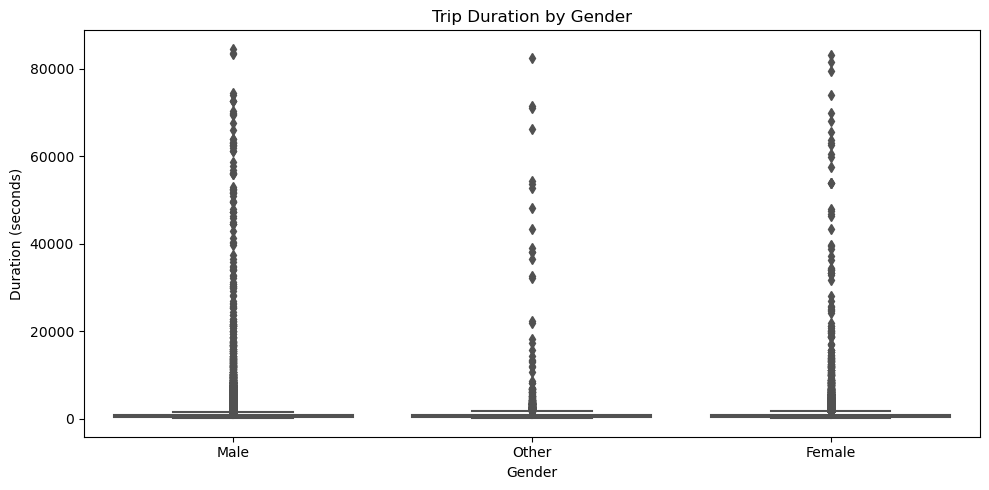

In [30]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=df, x='member_gender', y='duration_sec', color=sb.color_palette()[1])
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')
plt.tight_layout() 
plt.show()

The trip duration values are too widespread, making the initial boxplot hard to interpret.

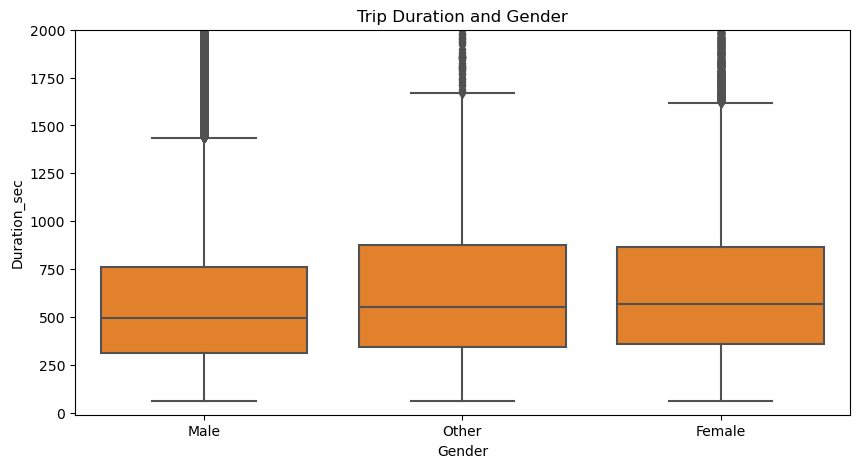

In [31]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

With this clearer plot, females have longer trip than males

Duration by gender user type.

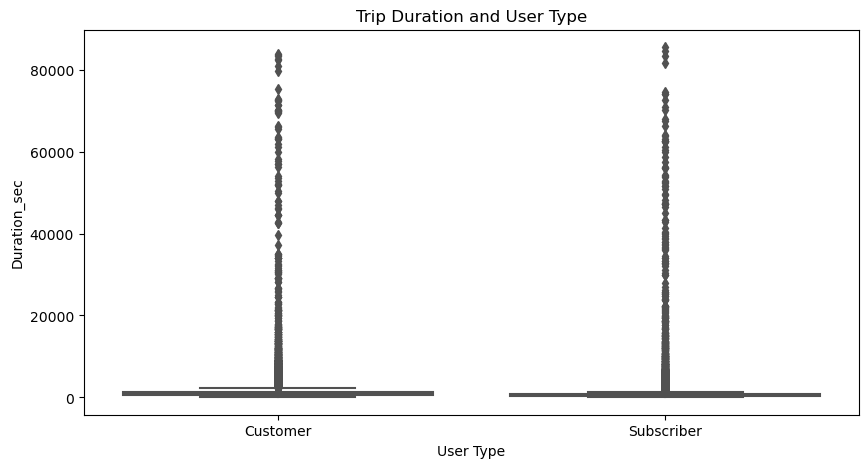

In [30]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

Again, the trip duration values are too widespread betwen customer and subscriber, making the initial boxplot hard to interpret.

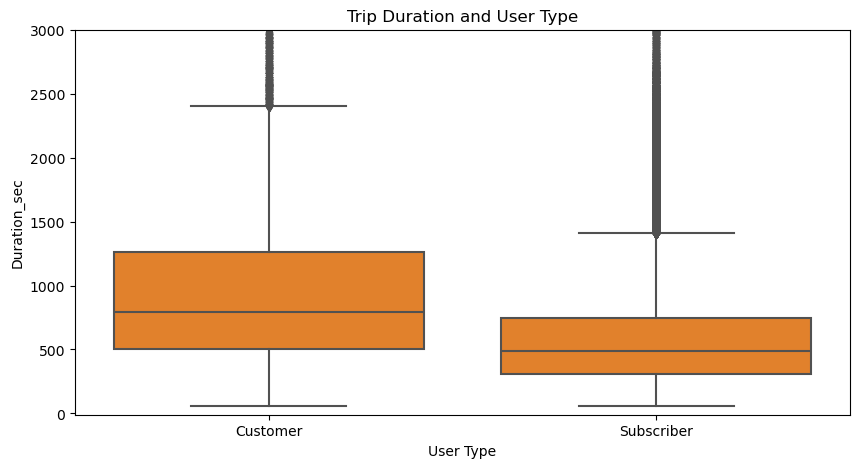

In [31]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

With this clearer plot, customers have a much higher trip duration than subscriber.

### Relationships Observed
Trip Duration and Age: Trip duration is strongly influenced by the member's age. Members aged between 20 and 45 tend to have longer trips compared to older age groups.

Trip Duration and Stations: Start and end stations have a limited overall impact on trip duration. However, certain start stations are associated with longer trips, and some end stations also correspond to increased durations. This indicates that specific stations may influence the length of trips either at the beginning or end.

### Additional Feature Relationships
User Type and Gender: Unexpectedly, both user type and gender show inverse relationships with trip duration:

- Gender: Although male members are the majority, they have shorter trip durations.
- User Type: Subscribers are more prevalent but have shorter trip durations compared to customers.

### Multivariate Exploration
In this section, I explore how user type and gender interact with age to influence trip duration. This analysis aims to uncover combined effects of these categorical variables on how long trips last.

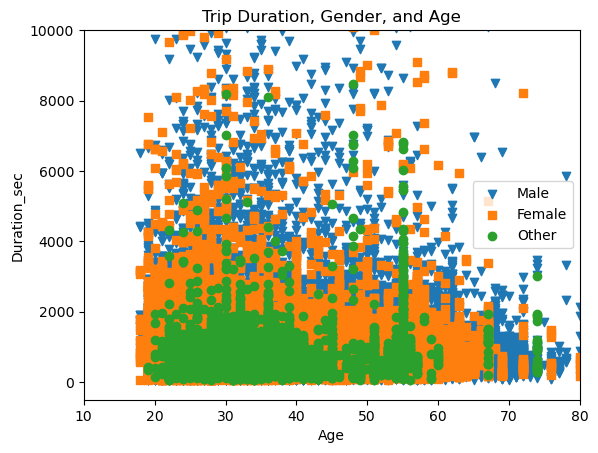

In [26]:
import matplotlib.pyplot as plt

# Define gender markers using a dictionary for clarity
gender_markers = {'Male': 'v', 'Female': 's', 'Other': 'o'}

# Plot scatter points for each gender
for gender, marker in gender_markers.items():
    subset = df[df['member_gender'] == gender]
    plt.scatter(
        2019 - subset['member_birth_year'],  # Calculate age
        subset['duration_sec'],
        marker=marker,
        label=gender,
        alpha=1
    )

# Customize the plot
plt.legend()
plt.xlim(10, 80)
plt.ylim(-500, 10000)
plt.title('Trip Duration, Gender, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()


The plot is not clear, I will separate all three genders into different graphs

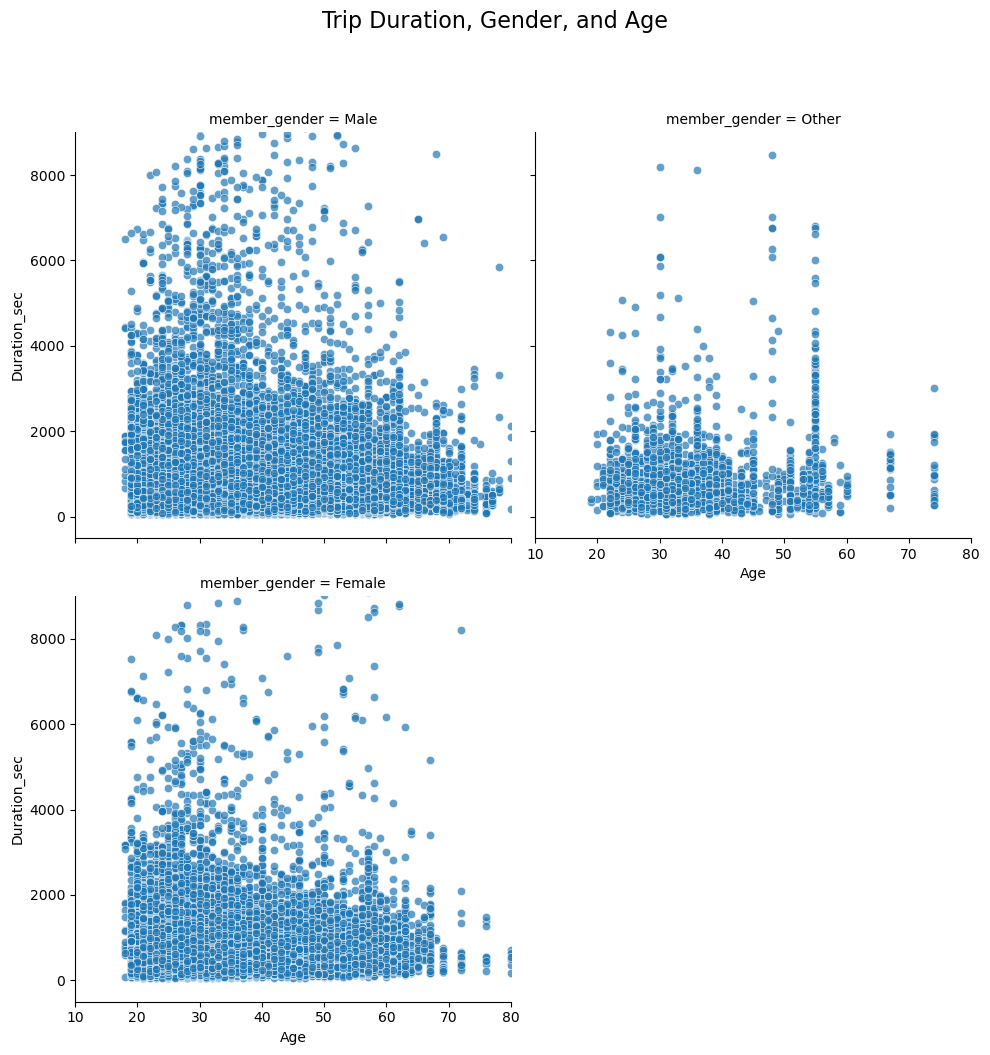

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['age'] = 2019 - df['member_birth_year']

gender = sns.FacetGrid(
    data=df, 
    col='member_gender', 
    col_wrap=2, 
    height=5,             
    aspect=1       
)

# Map the scatter plot onto the FacetGrid
gender.map(
    plt.scatter, 
    'age', 
    'duration_sec', 
    alpha=0.7,      
    edgecolor='w',        
    linewidth=0.5      
)

# Set axis labels and limits
gender.set(
    xlim=(10, 80), 
    ylim=(-500, 9000)
)
gender.set_axis_labels('Age', 'Duration_sec')

# Adjust the title and layout
gender.fig.suptitle('Trip Duration, Gender, and Age', fontsize=16, y=1.05)
plt.tight_layout()

# Save and display the plot
plt.savefig('gender_age_type_trip_duration.png', bbox_inches='tight')
plt.show()


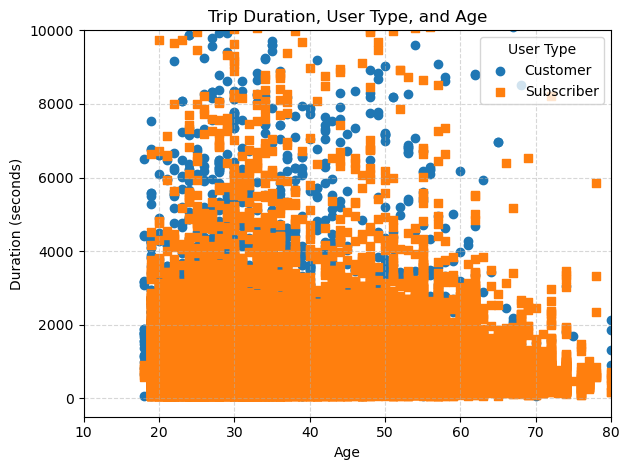

In [27]:
import matplotlib.pyplot as plt

# Define user type markers using a dictionary for clarity
usertype_markers = {'Customer': 'o', 'Subscriber': 's'}

# Calculate age and add it as a new column for efficiency
df['age'] = 2019 - df['member_birth_year']

# Plot scatter points for each user type
for utype, marker in usertype_markers.items():
    subset = df[df['user_type'] == utype]
    plt.scatter(
        subset['age'],               
        subset['duration_sec'],      
        marker=marker,
        label=utype,
        alpha=1
    )

# Customize the plot
plt.legend(title='User Type')
plt.xlim(10, 80)
plt.ylim(-500, 10000)
plt.title('Trip Duration, User Type, and Age')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout() 

plt.show()


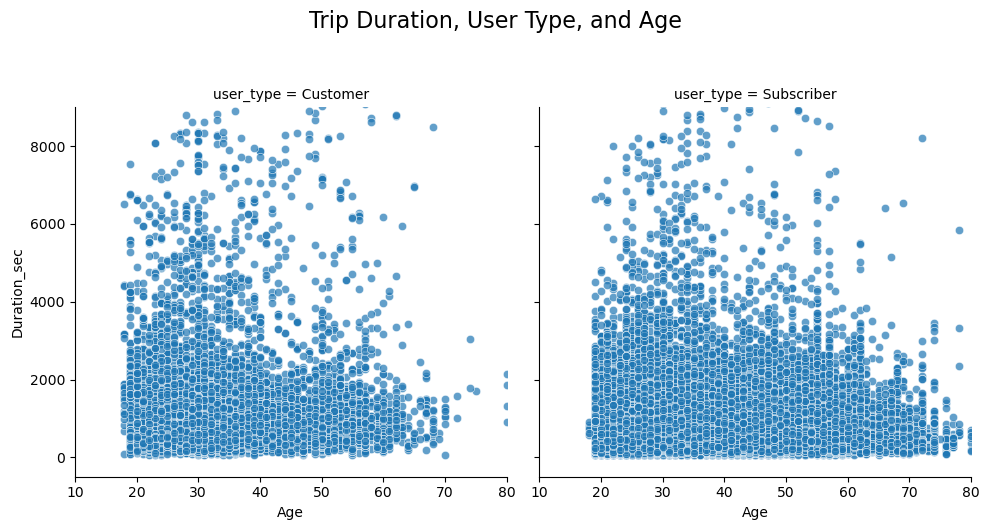

user_type
Subscriber    163544
Customer       19868
Name: count, dtype: int64


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['age'] = 2019 - df['member_birth_year']

required_columns = ['user_type', 'age', 'duration_sec']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns in DataFrame: {missing_columns}")
else:
    
    user_type_grid = sns.FacetGrid(
        data=df, 
        col='user_type', 
        col_wrap=2, 
        height=5,              
        aspect=1               
    )

    user_type_grid.map(
        plt.scatter, 
        'age', 
        'duration_sec', 
        alpha=0.7,            
        edgecolor='w',        
        linewidth=0.5         
    )


    user_type_grid.set(
        xlim=(10, 80), 
        ylim=(-500, 9000)
    )
    user_type_grid.set_axis_labels('Age', 'Duration_sec')

    user_type_grid.fig.suptitle('Trip Duration, User Type, and Age', fontsize=16, y=1.05)
    plt.tight_layout()

    plt.savefig('user_type_trip_duration.png', bbox_inches='tight')
    plt.show()

    user_type_count = df['user_type'].value_counts()
    print(user_type_count)


### Relationships Observed
- Trip Duration and Age: Trip duration significantly varies with age. Members aged 20-45 generally take longer trips compared to older age groups.
- Trip Duration and Stations: While start and end stations have a modest overall impact on trip duration, specific stations are linked to longer trips. This suggests that certain locations may influence how long a trip lasts.

### Additional Feature Relationships
- User Type and Gender: Both user type and gender show inverse relationships with trip duration:
- Gender: Although males are the majority, they tend to have shorter trip durations.
User Type: Subscribers are more common but have shorter trip durations compared to customers.